In [3]:
!pip install --upgrade plotly

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [5]:
df = pd.read_csv('dataset.csv')

In [6]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [7]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [8]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [9]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [10]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Month']+'-'+df['Day']+'-'+df['Year'])

In [11]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [12]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [13]:
model = Prophet(interval_width = 0.95, daily_seasonality = True)
fitted_model = model.fit(df)

In [14]:
future = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.489276,753.943091,3968.500090,3041.489276,3041.489276,-641.915345,-641.915345,-641.915345,467.724032,...,16.611941,16.611941,16.611941,-1126.251318,-1126.251318,-1126.251318,0.0,0.0,0.0,2399.573931
1,2018-01-02,3042.246698,820.078312,4077.955536,3042.246698,3042.246698,-652.029690,-652.029690,-652.029690,467.724032,...,-11.285067,-11.285067,-11.285067,-1108.468655,-1108.468655,-1108.468655,0.0,0.0,0.0,2390.217008
2,2018-01-03,3043.004119,804.858393,3890.722653,3043.004119,3043.004119,-626.188801,-626.188801,-626.188801,467.724032,...,-4.407267,-4.407267,-4.407267,-1089.505566,-1089.505566,-1089.505566,0.0,0.0,0.0,2416.815318
3,2018-01-04,3043.761541,1030.773190,4015.025255,3043.761541,3043.761541,-579.252371,-579.252371,-579.252371,467.724032,...,22.462032,22.462032,22.462032,-1069.438435,-1069.438435,-1069.438435,0.0,0.0,0.0,2464.509170
4,2018-01-05,3044.518962,890.169021,4001.937401,3044.518962,3044.518962,-615.260367,-615.260367,-615.260367,467.724032,...,-34.588120,-34.588120,-34.588120,-1048.396280,-1048.396280,-1048.396280,0.0,0.0,0.0,2429.258595


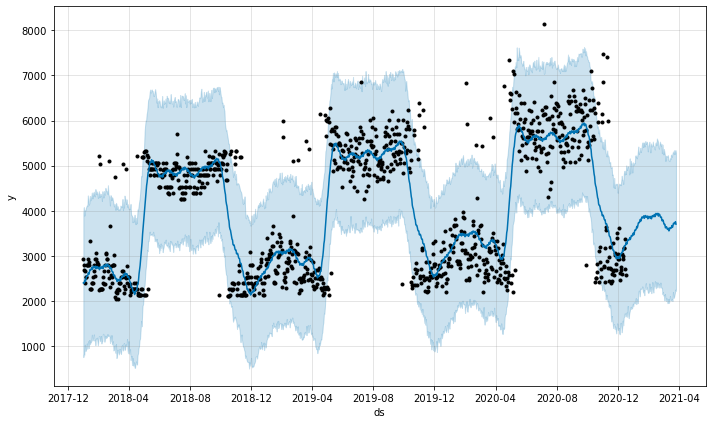

In [15]:
plot1 = model.plot(forecast)

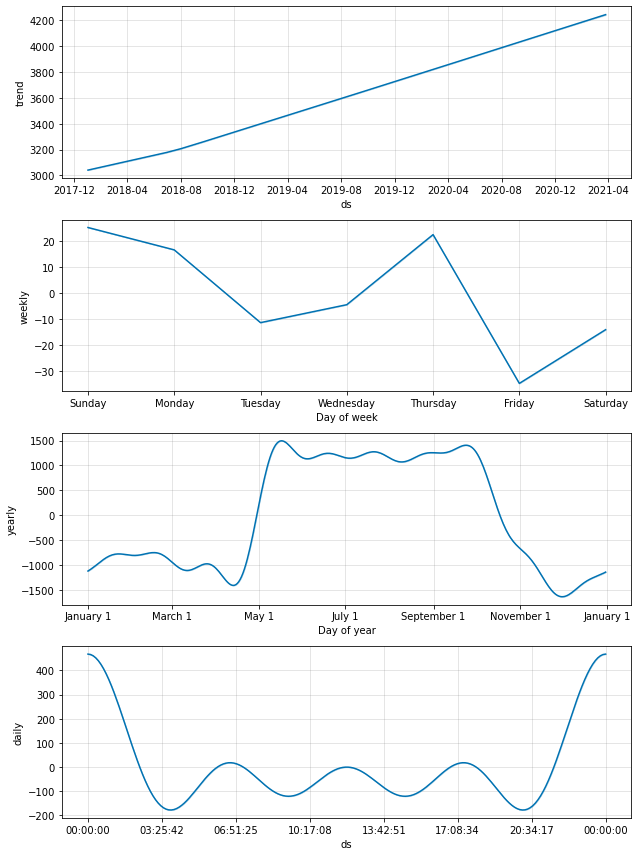

In [16]:
plt2 = model.plot_components(forecast)